In [2]:
import numpy as np

import scipy
from scipy import special, spatial, sparse
import scipy.sparse.linalg

import matplotlib.pyplot as plt
from matplotlib import animation, rc, ticker
rc('animation', html='jshtml')

import scipy
from scipy import signal, linalg

from IPython.display import clear_output, HTML

import math
import random
import time

from numba import jit, njit, prange

sys.path.append("..")
sys.path.append("../shared")
sys.path.append("../IDL")
from wednesdaySPEED import simulation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import analytic_tools

In [44]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def MI(s1, s2):
    l = len(s1)
    v1 = s1.reshape(l, 1)
    v2 = s2.reshape(l, 1)
    return ee.mi(v1, v2)
    
def visualiseNICE(G, P, N, S, X, D, T, U, C, N0, N1):
    space = 0.05
    # space = 0
    fig, (ax1,ax3,ax2,ax4,ax5,ax8) = plt.subplots(
        ncols=1, nrows=6, figsize=(12,9), sharex=True, gridspec_kw = 
        {'wspace':0, 'hspace':space, 'height_ratios':[2,1,1,1,1,1]}
    )

    im1 = ax1.imshow(G.T, cmap="bone", interpolation="None", aspect="auto")
    im4 = ax4.imshow(P.T, cmap="YlOrBr", interpolation="None", aspect="auto")
    # amnwc = np.max(np.abs(N-initial_account_balance))  # absolute max net worth change
    # vmin, vmax = initial_account_balance-amnwc, initial_account_balance+amnwc
    im5 = ax5.imshow(N.T, cmap="Greens", interpolation="None", aspect="auto")#, vmin=vmin, vmax=vmax)

    size = "2%"
    cax1 = make_axes_locatable(ax1).append_axes('right', size=size, pad=space)
    fig.colorbar(im1, cax=cax1, orientation='vertical')
    cax4 = make_axes_locatable(ax4).append_axes('right', size=size, pad=space)
    fig.colorbar(im4, cax=cax4, orientation='vertical')
    cax5 = make_axes_locatable(ax5).append_axes('right', size=size, pad=space)
    fig.colorbar(im5, cax=cax5, orientation='vertical')

    for ax in [ax2, ax3]:
        cax = make_axes_locatable(ax).append_axes('right', size=size, pad=space)
        cax.get_xaxis().set_visible(False)
        cax.get_yaxis().set_visible(False)
        cax.axis('off')

    ax2.set_yscale("log")
    ax2.plot(S, label="S", color="black")
    ax2.grid(alpha=0.3, which="major")

    window = 10
    crash_indices = analytic_tools.get_crash_indices(X, 0.9, window=window)
    j=0
    for i in crash_indices:
        if i<=j+1: continue
        j = min(i+window, N0-1)
        x = np.arange(i,j)
        print(x)
        y1 = np.ones_like(x) * S.max()
        y2 = np.ones_like(x) * S.min()
        ax2.fill_between(x, y1, y2, color="red", alpha=0.2)

    colors = ["red" if x<0 else "green" for x in X]
    ax3.bar(np.arange(len(X)), X, color=colors)
    ax3.fill_between(np.arange(N0), [0 for x in X], [X.max() for x in X], alpha=0.1, color="green")
    ax3.fill_between(np.arange(N0), [0 for x in X], [X.min() for x in X], alpha=0.1, color="red")
    # ax3.grid(alpha=0.3)

    signal = np.ones(shape=(9,9))
    signal[1:8,1:8] = 2.5
    signal[2:7,2:7] = 5
    signal[3:6,3:6] = 7.5
    signal[4,4] = 10

    convC = scipy.signal.convolve2d(C, signal).astype(float)[4:N0+4, 4:N1+4]
    im8 = ax8.imshow(convC.T, cmap="Reds", interpolation="None", aspect="auto")
    cax8 = make_axes_locatable(ax8).append_axes('right', size=size, pad=space)

    fig.colorbar(im8, cax=cax8, orientation='vertical')
    
    ax8.set_xlabel("Time")
    ax2.set_ylabel("Price")
    ax1.set_ylabel("Traders")
    ax3.set_ylabel("Log returns")
    ax4.set_ylabel("Portfolio")
    ax5.set_ylabel("Net worth")
    ax8.set_ylabel("Margin calls")

    fig.align_ylabels((ax1,ax3,ax2,ax4,ax5,ax8))
    plt.tight_layout()

    plt.savefig("tmp.png", dpi=300)
    plt.show()

[358 359 360 361 362 363 364 365 366 367]
[433 434 435 436 437 438 439 440 441 442]
[470 471 472 473 474 475 476 477 478 479]


<ipython-input-44-7393f24e30e0>:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


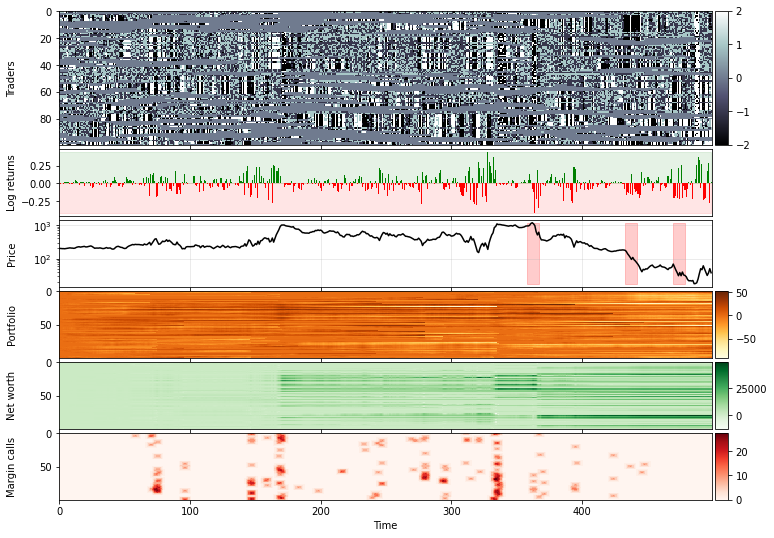

In [45]:
N0=500
N1=100
# G,P,N,S,X,D,T,U,C, initial_account_balance = simulation(
#     trigger = False, bound = True, pd = 0.03, pe = 0.01,
#     ph = 0.03, pa = 0.6, N0=N0, N1=N1, A=4, a=1, h=1, 
#     pi1 = 0.8, pi2 = 0.1, pi3 = 0.1, ub=1000, lb=20)
# print(".")
visualiseNICE(G, P, N, S, X, D, T, U, C, N0, N1)